# **Assignment 4 - MNIST classifier with various training knobs using keras**

### Arpitha Gurumurthy

### **Data :** 
Kaggle dataset https://www.kaggle.com/c/digit-recognizer/data </br>
The files train.csv and test.csv contains gray-scale images of hand-drawn digits 0 through 9.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* The train.csv has 785 columns. The first column called "label", is the hand drawn digit. The rest of the columns contain the pixel-values of the associated image.
* The test.csv is the same as the training set, except that it does not contain the "label" column.


## **Data Collection :** 
Here, we are  authorizing my google drive to access and download the kaggle datasets and download it on the colab as shown below.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/258_HW3/digit_recognizer_data

/content/gdrive/My Drive/258_HW3/digit_recognizer_data


In [ ]:
## Required only on the first run to get the datasets on to the drive
## !kaggle competitions download -c digit-recognizer
## !mkdir digit_recognizer_data 
## !mv *.zip digit_recognizer_data/
## %cd digit_recognizer_data/
## !unzip test.csv.zip
## !unzip train.csv.zip

In [3]:
##Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

##Reading the csv into dataframes
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## **Exploratory Data Analysis and Feature Engineering**

In [4]:
##Understanding the training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
##Check for the shape of train data
train.shape

(42000, 785)

In [6]:
##Check for the shape of test data
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
##Check for the shape of test data
test.shape

(28000, 784)

In [8]:
Y_train = train["label"]

In [9]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


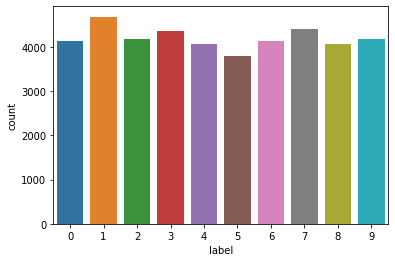

In [10]:
##Plotting to check data distribution
sns.countplot(Y_train)

In [11]:
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [12]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


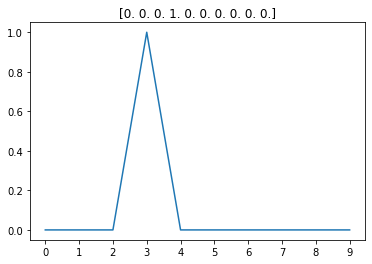

In [13]:
plt.title(Y_train[7])
plt.plot(Y_train[7])
plt.xticks(range(10));

In [14]:
# free some space
del train 

#Check for null values

In [15]:
X_train.isna().sum().describe()

count    784.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [16]:
test.isna().sum().describe()

count    784.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [17]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [18]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [19]:
# Set the random seed
random_seed = 2

In [20]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

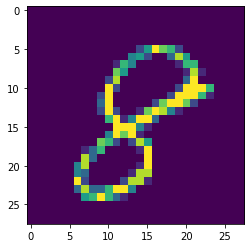

In [21]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [ ]:
from keras.constraints import maxnorm
from keras.optimizers import SGD
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(60, input_dim=60, input_shape = (28,28,1), activation='relu', kernel_constraint=maxnorm(3)))
  model.add(Dropout(0.2))
  model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(10, activation = "softmax"))
  # Compile model
  sgd = SGD(lr=0.1, momentum=0.9)
  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

In [ ]:
# build the model
model = create_model()
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=1, batch_size=100, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

378/378 - 57s - loss: 0.1055 - accuracy: 0.8484 - val_loss: 0.0756 - val_accuracy: 0.8910
Baseline Error: 10.90%


# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
        
datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=100),
                              epochs = 2, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0]
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
37800/37800 - 68s - loss: 0.1994 - accuracy: 0.6331 - val_loss: 0.1223 - val_accuracy: 0.8238


# Evaluation

Epoch 1/10
378/378 - 57s - loss: 0.0593 - accuracy: 0.9237 - val_loss: 0.0602 - val_accuracy: 0.9210
Epoch 2/10
378/378 - 55s - loss: 0.0584 - accuracy: 0.9265 - val_loss: 0.0609 - val_accuracy: 0.9205
Epoch 3/10
378/378 - 55s - loss: 0.0583 - accuracy: 0.9258 - val_loss: 0.0598 - val_accuracy: 0.9236
Epoch 4/10
378/378 - 55s - loss: 0.0571 - accuracy: 0.9284 - val_loss: 0.0591 - val_accuracy: 0.9221
Epoch 5/10
378/378 - 55s - loss: 0.0567 - accuracy: 0.9287 - val_loss: 0.0620 - val_accuracy: 0.9210
Epoch 6/10
378/378 - 55s - loss: 0.0561 - accuracy: 0.9299 - val_loss: 0.0567 - val_accuracy: 0.9255
Epoch 7/10
378/378 - 56s - loss: 0.0559 - accuracy: 0.9305 - val_loss: 0.0588 - val_accuracy: 0.9217
Epoch 8/10
378/378 - 55s - loss: 0.0551 - accuracy: 0.9313 - val_loss: 0.0588 - val_accuracy: 0.9233
Epoch 9/10
378/378 - 55s - loss: 0.0549 - accuracy: 0.9321 - val_loss: 0.0572 - val_accuracy: 0.9226
Epoch 10/10
378/378 - 55s - loss: 0.0542 - accuracy: 0.9328 - val_loss: 0.0602 - val_accura

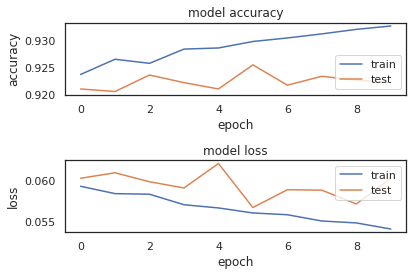

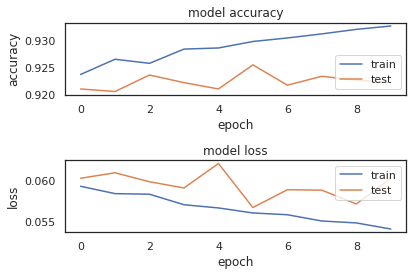

In [ ]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=100, epochs=10,
          verbose=2,
          validation_data=(X_val, Y_val))

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

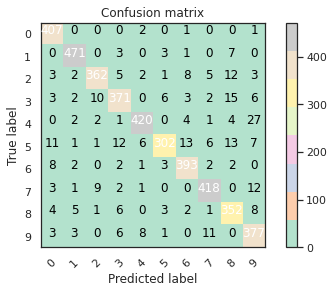

In [ ]:
##Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Pastel2):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# predict results
results = model.predict(test)


In [ ]:
results

array([[4.0953732e-03, 1.8577820e-08, 9.9221295e-01, ..., 2.5369345e-06,
        2.1156801e-03, 2.0861927e-04],
       [9.9853361e-01, 1.5310749e-10, 7.9624457e-05, ..., 4.2229309e-05,
        8.0727477e-05, 1.1601360e-05],
       [2.8478212e-03, 2.3618230e-01, 2.7088622e-02, ..., 8.3911702e-02,
        5.8085952e-02, 1.9087371e-01],
       ...,
       [1.3485694e-03, 2.7144875e-03, 6.7687863e-03, ..., 5.1290274e-02,
        3.8126148e-02, 1.7552534e-02],
       [2.5479286e-03, 2.6850501e-04, 2.4875475e-04, ..., 1.1026751e-02,
        6.6259690e-02, 7.3177159e-01],
       [1.6286715e-03, 1.6110637e-07, 9.9211848e-01, ..., 7.8113993e-07,
        2.0972732e-03, 7.0092932e-04]], dtype=float32)

## References: 
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 <br/>
https://nextjournal.com/gkoehler/digit-recognition-with-keras <br/>
https://www.kaggle.com/poonaml/deep-neural-network-keras-way